In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

ARIMA(8:2)

In [3]:
data = pd.read_csv('HaNoi.csv')

# Chuyển đổi cột 'date' thành định dạng thời gian
data['date'] = pd.to_datetime(data['date'])
data = data.loc[(data['date'] >= '2019-01-03') & (data['date'] <= '2024-01-03')]
data['date'] = data['date'].dt.strftime('%d-%m-%Y')
data

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,AQI
1060,1061,03-05-2019,65,37,13,18,13,12,65
1061,1062,04-05-2019,65,37,17,18,13,12,65
1062,1063,05-05-2019,65,37,71,18,13,12,71
1063,1064,06-05-2019,65,37,24,18,13,12,65
1064,1065,07-05-2019,65,37,56,18,13,12,65
...,...,...,...,...,...,...,...,...,...
2697,2698,30-12-2023,192,71,7,30,24,8,192
2698,2699,31-12-2023,118,81,16,32,24,8,118
2699,2700,01-01-2024,140,65,13,27,24,8,140
2700,2701,02-01-2024,98,52,11,21,23,7,98


In [4]:
train_size = int(0.8*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11994.222, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12220.532, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12208.002, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12194.146, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12218.538, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11993.150, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12047.788, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12011.204, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11994.590, Time=0.83 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12008.577, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11995.255, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11995.964, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11991.407, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=12045.921, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))

In [6]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[133.52999453 133.45061945 133.41545016 133.39986744 133.39296309
 133.38990393 133.38854848 133.38794792 133.38768182 133.38756392
 133.38751168 133.38748853 133.38747828 133.38747373 133.38747172
 133.38747083 133.38747043 133.38747026 133.38747018 133.38747014
 133.38747013 133.38747012 133.38747012 133.38747012 133.38747012
 133.38747012 133.38747012 133.38747012 133.38747012 133.38747012]


In [7]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 58.38342124633631
MAE: 52.1514756915501
MAPE: 82.9798488851393


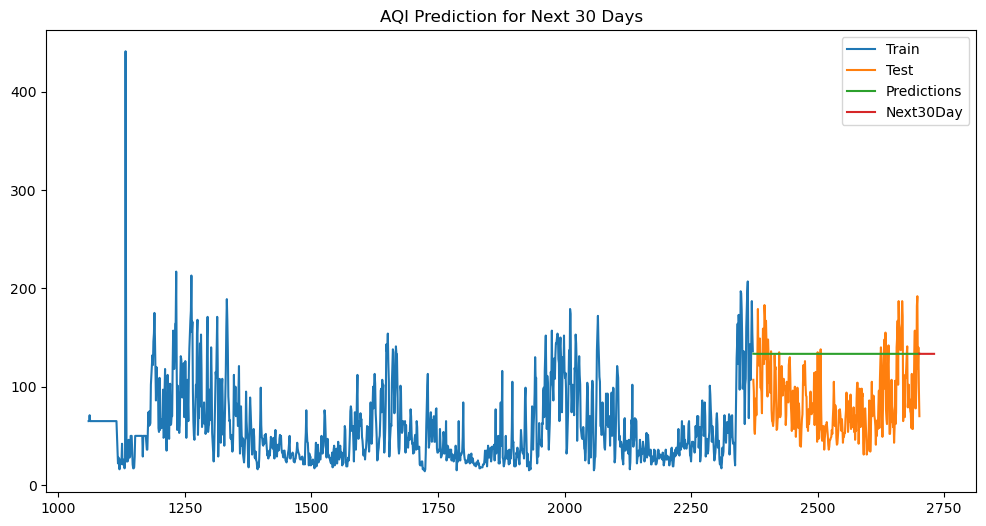

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

ARIMA(7:3)

In [9]:
train_size = int(0.7*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10530.654, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10740.535, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10726.974, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10712.537, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10738.537, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10529.408, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10580.077, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10542.516, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10531.049, Time=0.83 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10543.720, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10530.715, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10532.220, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=10527.527, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=10578.134, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [10]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[26.44373974 27.31570774 27.70495764 27.8787203  27.95628863 27.99091543
 28.00637297 28.01327327 28.0163536  28.01772867 28.0183425  28.01861652
 28.01873884 28.01879345 28.01881782 28.01882871 28.01883356 28.01883573
 28.0188367  28.01883713 28.01883733 28.01883741 28.01883745 28.01883747
 28.01883747 28.01883748 28.01883748 28.01883748 28.01883748 28.01883748]


In [11]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 64.07687544492383
MAE: 51.194308189618496
MAPE: 56.21064420446474


plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

ARIMA(9:1)

In [12]:
train_size = int(0.9*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13489.668, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13747.655, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13731.896, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13714.969, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13745.655, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13489.281, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13551.248, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13508.053, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13490.267, Time=0.96 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13507.767, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13491.868, Time=0.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13491.394, Time=1.28 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=13487.281, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=13549.248, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[68.73898707 67.01102919 66.23554862 65.88752503 65.73133747 65.66124293
 65.62978559 65.61566803 65.60933228 65.6064889  65.60521284 65.60464016
 65.60438315 65.60426781 65.60421604 65.60419281 65.60418239 65.60417771
 65.60417561 65.60417467 65.60417424 65.60417405 65.60417397 65.60417393
 65.60417391 65.60417391 65.6041739  65.6041739  65.6041739  65.6041739 ]


In [14]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 40.88413973315732
MAE: 28.722075975569272
MAPE: 30.151569997370725


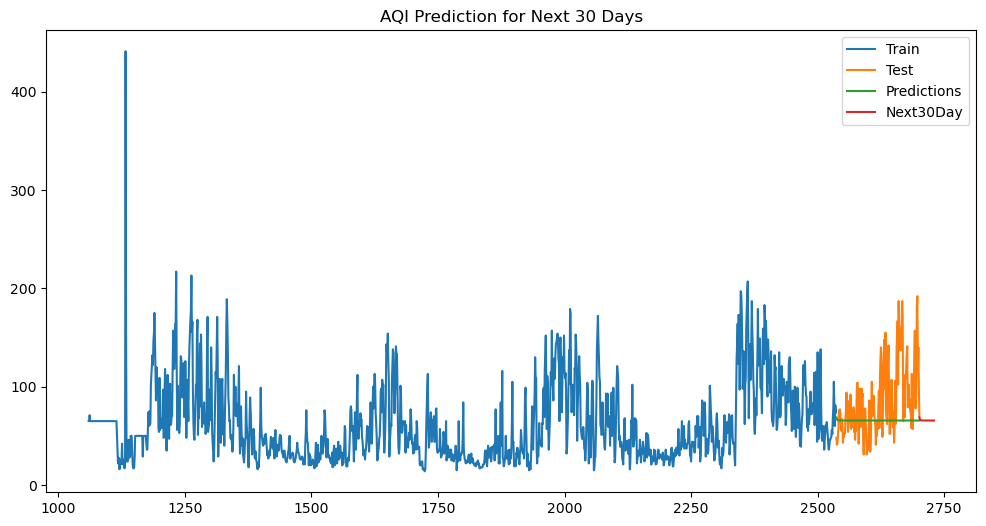

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()